In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the CSV file
file_path=r'C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\SMC_data\HEPData-ins471981-v1-csv\Table7.csv'

In [3]:
#Read the data, skipping the header lines that start with #
data=pd.read_csv(file_path, comment='#')

In [4]:
#Calculate x as (x_low + x_high) / 2
x_center=(data['X LOW']+data['X HIGH'])/2

In [5]:
#Extract the relevant columns
g1=data['G1']
q2_mean=data['MEAN(NAME=Q**2) [GEV**2]']
g1_stat_pos=data['stat +']
g1_stat_neg=data['stat -']
g1_sys_pos=data['sys +']
g1_sys_neg=data['sys -']

In [6]:
# Calculate total uncertainties (statistical + systematic in quadrature)
g1_err_pos = np.sqrt(g1_stat_pos**2)
g1_err_neg = np.sqrt(g1_stat_neg**2)

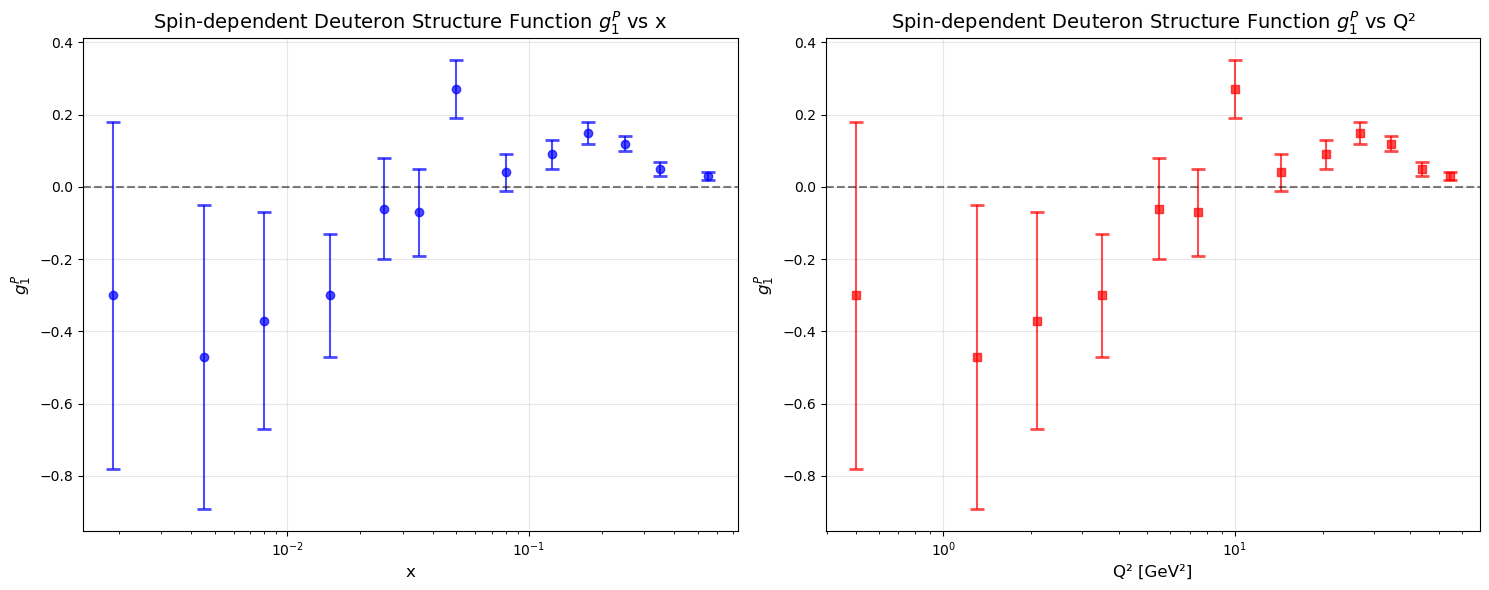

Data Summary:
Number of data points: 13
x range: 0.0019 to 0.5500
Q² range: 0.5 to 54.8 GeV²
G₁ range: -0.470 to 0.270

First few data points:
    X LOW  X HIGH  MEAN(NAME=Q**2) [GEV**2]    G1
0  0.0008   0.003                       0.5 -0.30
1  0.0030   0.006                       1.3 -0.47
2  0.0060   0.010                       2.1 -0.37
3  0.0100   0.020                       3.5 -0.30
4  0.0200   0.030                       5.5 -0.06


In [7]:
#Plotting and Data
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: G1 vs x
ax1.errorbar(x_center, g1, yerr=[g1_err_neg, g1_err_pos], 
             fmt='o', capsize=5, capthick=2, markersize=6, 
             color='blue', ecolor='blue', alpha=0.7)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('$g_1^P$', fontsize=12)
ax1.set_title('Spin-dependent Deuteron Structure Function $g_1^P$ vs x', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Plot 2: G1 vs Q²
ax2.errorbar(q2_mean, g1, yerr=[g1_err_neg, g1_err_pos], 
             fmt='s', capsize=5, capthick=2, markersize=6, 
             color='red', ecolor='red', alpha=0.7)
ax2.set_xlabel('Q² [GeV²]', fontsize=12)
ax2.set_ylabel('$g_1^P$', fontsize=12)
ax2.set_title('Spin-dependent Deuteron Structure Function $g_1^P$ vs Q²', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print("Data Summary:")
print(f"Number of data points: {len(data)}")
print(f"x range: {x_center.min():.4f} to {x_center.max():.4f}")
print(f"Q² range: {q2_mean.min():.1f} to {q2_mean.max():.1f} GeV²")
print(f"G₁ range: {g1.min():.3f} to {g1.max():.3f}")
print("\nFirst few data points:")
print(data[['X LOW', 'X HIGH', 'MEAN(NAME=Q**2) [GEV**2]', 'G1']].head())